In [1]:
"""
Notebook con analisis de presencia de caos otros indicadores para datos SARS-CoV-II en NY.

- Dimension de Inmersion d (Flase Nearest Neihjbours Test. Kennel et al 1992)
- Tiempo de retardo (delay) tau
- Ventana de Theiler (ACF/ Time-Space Separation)
- Maximo coeficiente del exponente de Lyapunov (MCLE)
- Dimension de Correlacion (Grassberger and Procaccia Algorithm 1985b, Takens Estimator 1985)

"""

'\nNotebook con analisis de presencia de caos otros indicadores para datos SARS-CoV-II en NY.\n\n- Dimension de Inmersion d (Flase Nearest Neihjbours Test. Kennel et al 1992)\n- Tiempo de retardo (delay) tau\n- Ventana de Theiler (ACF/ Time-Space Separation)\n- Maximo coeficiente del exponente de Lyapunov (MCLE)\n- Dimension de Correlacion (Grassberger and Procaccia Algorithm 1985b, Takens Estimator 1985)\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from matplotlib import animation

sns.set()


from nolitsa import data, dimension, delay, noise, lyapunov
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.filters.hp_filter import hpfilter

from sklearn.metrics import mutual_info_score
from scipy.stats import chi2_contingency

# Nueva York

### Depuramos los datos de la serie de tiempo relacionada a UK, obtenida a través de [https://github.com/nytimes/covid-19-data]

In [6]:
data_US_counties = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_bruto\us-counties.csv', parse_dates=['date'], index_col='date')

data_NY = data_US_counties[data_US_counties['county'] == 'New York City'].drop(columns=['county', 'fips', 'state'])
NY_cases = data_NY['cases'].diff().iloc[1:]
NY_deaths = data_NY['deaths'].diff().iloc[1:]


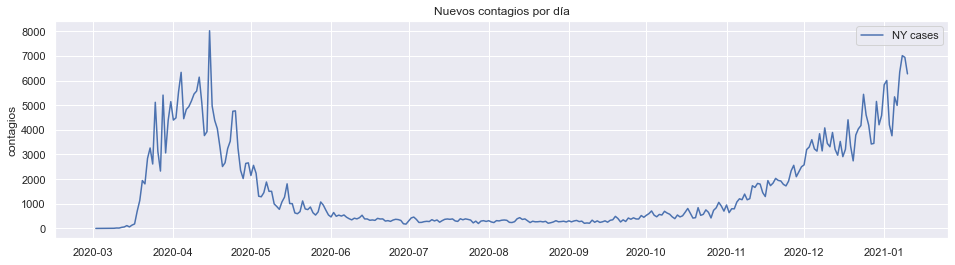

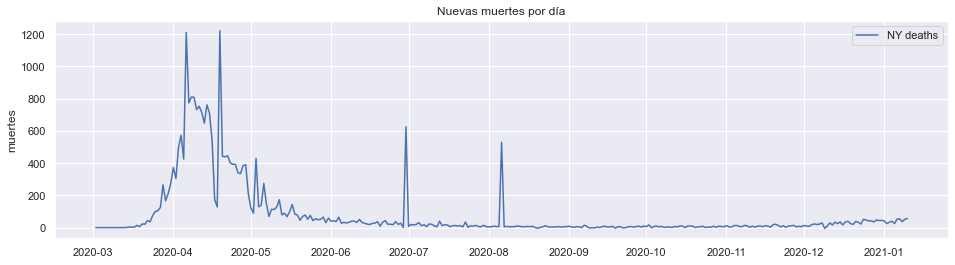

In [8]:
plt.figure(0, figsize=(16,4))
plt.clf()
plt.plot(NY_cases, label='NY cases')
plt.title('Nuevos contagios por día')
plt.ylabel('contagios')
plt.legend()
plt.show()

plt.figure(1, figsize=(16,4))
plt.clf()
plt.plot(NY_deaths, label='NY deaths')
plt.title('Nuevas muertes por día')
plt.ylabel('muertes')
plt.legend()
plt.show()

In [9]:
NY_cases = np.array(NY_cases)

NY_deaths  = np.array(NY_deaths)

NY_cases = NY_cases / np.max(NY_cases)

NY_deaths  = NY_deaths / np.max(NY_deaths)
NY_deaths = NY_deaths / np.max(NY_deaths)

# np.savetxt('NY_cases', NY_cases, delimiter=',')

# np.savetxt('NY_deaths', NY_deaths, delimiter=',')


### Obtenemos el Promedio de Informacion Mutua (AMI) mediante R

In [10]:
AMI_NY = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_para_R\AMI_NY.csv')
AMI_NY.head()

,mutual_NY_cases,mutual_NY_deaths
0,1.970544,0.864809
1,1.127042,0.539657
2,1.064624,0.521635
3,0.963424,0.526390
4,0.894718,0.490570


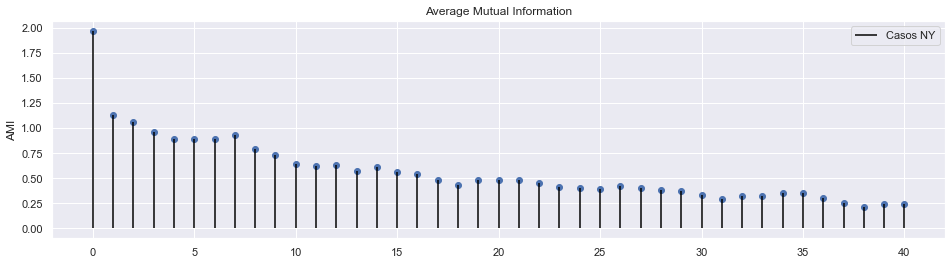

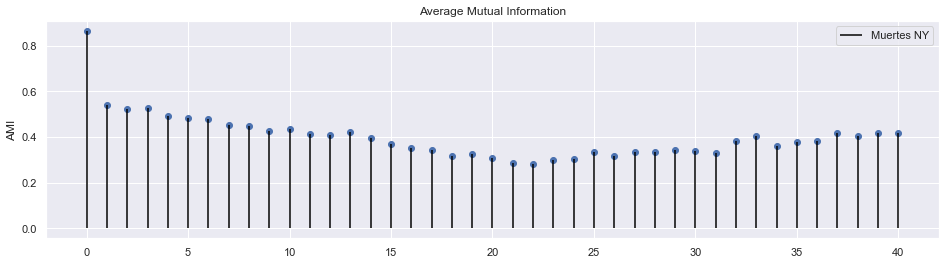

In [11]:
AMI_NY_cases = np.array(AMI_NY['mutual_NY_cases'])

AMI_NY_deaths = np.array(AMI_NY['mutual_NY_deaths'])

plt.figure(2, figsize=(16,4))
plt.clf()

plt.vlines(np.arange(41), ymin=0, ymax=AMI_NY_cases, label='Casos NY', color='black')
plt.scatter(np.arange(41), AMI_NY_cases, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()

plt.figure(3, figsize=(16,4))
plt.clf()

plt.vlines(np.arange(41), ymin=0, ymax=AMI_NY_deaths, label='Muertes NY', color='black')
plt.scatter(np.arange(41), AMI_NY_deaths, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()


In [12]:
delay_NY_cases = []

delay_NY_deaths = []

for i in range(len(AMI_NY_cases)-2):
    if AMI_NY_cases[i] > AMI_NY_cases[i+1] and AMI_NY_cases[i+2] > AMI_NY_cases[i+1]:
        delay_NY_cases.append(i+1)

for i in range(len(AMI_NY_deaths)-2):
    if AMI_NY_deaths[i] > AMI_NY_deaths[i+1] and AMI_NY_deaths[i+2] > AMI_NY_deaths[i+1]:
        delay_NY_deaths.append(i+1)

print('Tiempos de Retardo para NY casos:', delay_NY_cases)
print('Tiempos de Retardo para NY muertes:', delay_NY_deaths)


Tiempos de Retardo para NY casos: [5, 11, 13, 18, 25, 31, 38]
Tiempos de Retardo para NY muertes: [2, 9, 12, 18, 22, 26, 28, 31, 34, 38]


- tau NY cases = 5, 11

- tau NY deaths = 2, 9

## Obtenemos mediante graficos de separacion espacio-temporales los siguientes Theiler Windows

- tw NY cases = 12 

- tw NY deaths = 13

## Para tseriesChaos obtenemos dimensión de inmersión 

- dim FNN NY cases = 3
- dim FNN NY deaths = 3


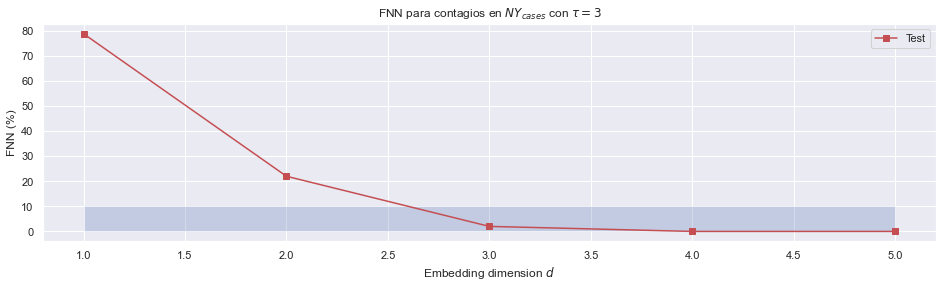

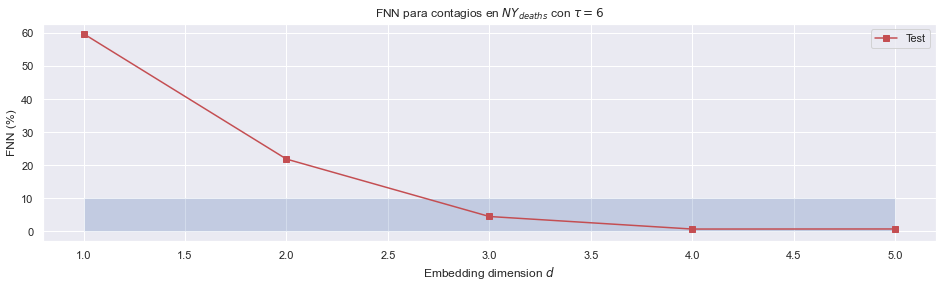

In [14]:
dim = np.arange(1, 6)
f1, f2, f3 = dimension.fnn(NY_cases, tau=5, dim=dim, window=12) #, metric='chebyshev')

plt.figure(4, figsize=(16,4))
plt.clf()
plt.title('FNN para contagios en $NY_{cases}$ con $\\tau=3$')
plt.xlabel('Embedding dimension $d$')
plt.ylabel('FNN (%)')
plt.plot(dim, 100 * f1, 'rs-', label=r'Test')
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.fill_between(dim, 10, alpha=0.25)
plt.legend()
plt.show()

f1, f2, f3 = dimension.fnn(NY_deaths, tau=9, dim=dim, window=13) #, metric='chebyshev')

plt.figure(5, figsize=(16,4))
plt.clf()
plt.title('FNN para contagios en $NY_{deaths}$ con $\\tau=6$')
plt.xlabel('Embedding dimension $d$')
plt.ylabel('FNN (%)')
plt.plot(dim, 100 * f1, 'rs-', label=r'Test')
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.fill_between(dim, 10, alpha=0.25)
plt.legend()
plt.show()


### Reconstruimos el atractor

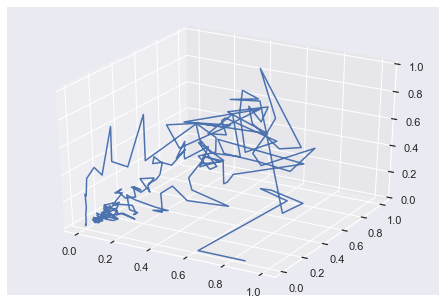

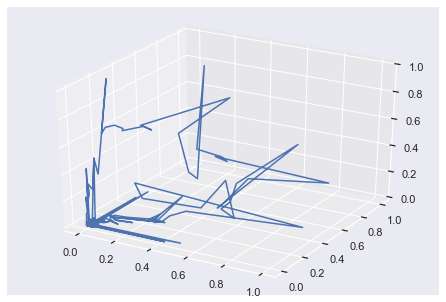

In [15]:
tau_NY_cases = 5

figg = plt.figure(6)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(NY_cases)[:-2].flatten()
data_lag1 = np.roll(np.array(NY_cases), -tau_NY_cases)[:-2].flatten()
data_lag2 = np.roll(np.array(NY_cases), -2 * tau_NY_cases)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

tau_NY_deaths = 9

figg = plt.figure(7)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(NY_deaths)[:-2].flatten()
data_lag1 = np.roll(np.array(NY_deaths), -tau_NY_deaths)[:-2].flatten()
data_lag2 = np.roll(np.array(NY_deaths), -2 * tau_NY_deaths)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

### Calculemos el Maximo Coeficiente del Exponente de Lyapunov (MCLE) mediante $\texttt{tseriesChaos}$ de $\texttt{R}$

- series: time series.
- m: embedding dimension.
- d: time delay.
- t: Theiler window. Points separated by less than t in the series series are excluded from the search for neighbouring points. [Importante para que se tomen vecinos espaciales, y no dados por la dinámica (es decir, temporales)]
- k: number of neighbours considered.
- ref: number of points in series taken into account.
- s: iterations along which the neighbours of each point are followed.
- eps: radius of the ball inside which nearest neighbours are searched for. [Muy importante para que no se considere vecinos a distancias gigantes]

In [20]:
S_nu_NY = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_para_R\S_nu_NY.csv')
S_nu_NY.head()

,S_nu_NY_cases,S_nu_NY_deaths
0,-4.065045,-5.125167
1,-3.357664,-3.619814
2,-3.209296,-3.539797
3,-3.160352,-3.701648
4,-3.172426,-3.665385


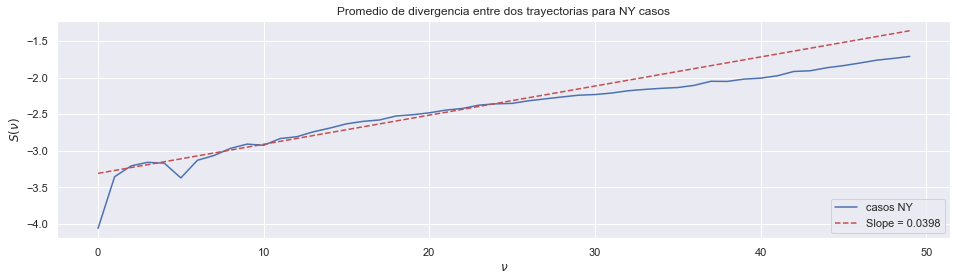

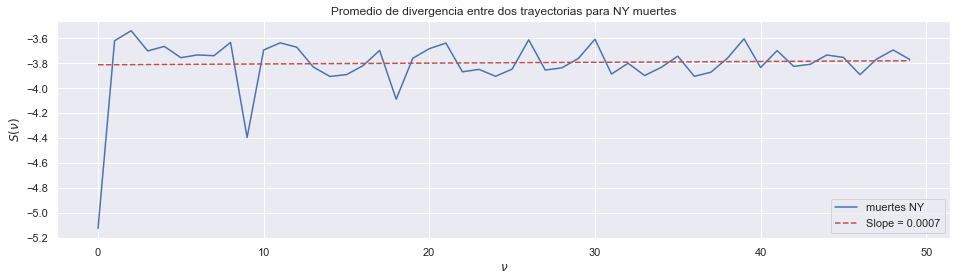

In [21]:
S_nu_NY_cases = S_nu_NY['S_nu_NY_cases']
S_nu_NY_deaths = S_nu_NY['S_nu_NY_deaths']

nu = np.arange(len(S_nu_NY_cases))

MCLE_NY_cases, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[3:30], S_nu_NY_cases[3:30])

plt.figure(9, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_NY_cases, label='casos NY')
plt.plot(nu, MCLE_NY_cases*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_NY_cases), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para NY casos')
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()

nu = np.arange(len(S_nu_NY_deaths))

MCLE_NY_deaths, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[5:33], S_nu_NY_deaths[5:33])

plt.figure(10, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_NY_deaths, label='muertes NY')
plt.plot(nu, MCLE_NY_deaths*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_NY_deaths), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para NY muertes')
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()

In [22]:
data = {'': ['NY casos', 'NY muertes'], 'MCLE': 365*np.round([MCLE_NY_cases, MCLE_NY_deaths], 5),'dim inmersion':[3, 3], 'delay': [5, 9], 'tw':[12, 13]}
NN = pd.DataFrame(data)
NN

,,MCLE,dim inmersion,delay,tw
0,NY casos,14.5416,3,5,12
1,NY muertes,0.2409,3,9,13
